## Primeiras análises

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read the data
df = pd.read_parquet('dados_sensores_5000.parquet')

In [3]:

def analyze_sector_consumption():
    # Previous sector analysis code remains the same
    sector_analysis = df.groupby('setor').agg({
        'energia_kwh': 'mean',
        'agua_m3': 'mean',
        'co2_emissoes': 'mean'
    }).round(2)
    
    print("\n=== Average Consumption by Sector ===")
    print(sector_analysis)
    
    for metric in ['energia_kwh', 'agua_m3', 'co2_emissoes']:
        fig = px.bar(sector_analysis, 
                    y=metric, 
                    title=f'Average {metric} by Sector',
                    labels={metric: metric.replace('_', ' ').title()})
        fig.show()



In [4]:
def identify_top_consumers():
    # Previous top consumers code remains the same
    metrics = ['energia_kwh', 'agua_m3', 'co2_emissoes']
    top_n = 5
    
    print("\n=== Top Consumers Analysis ===")
    for metric in metrics:
        print(f"\nTop {top_n} companies by {metric}:")
        print(df.nlargest(top_n, metric)[['empresa', 'setor', metric]])

In [7]:
def analyze_correlations():
    # New correlation analysis
    correlation_matrix = df[['energia_kwh', 'agua_m3', 'co2_emissoes']].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Between Consumption Metrics')
    plt.show()

In [5]:
def detect_outliers():
    # New outlier detection
    metrics = ['energia_kwh', 'agua_m3', 'co2_emissoes']
    
    for metric in metrics:
        df[f'{metric}_zscore'] = (df[metric] - df[metric].mean()) / df[metric].std()
        
        outliers = df[abs(df[f'{metric}_zscore']) > 3]
        print(f"\nOutliers in {metric}:")
        print(outliers[['empresa', 'setor', metric]].head())

In [11]:
def compare_sectors():
    # New statistical comparison
    sectors = df['setor'].unique()
    metrics = ['energia_kwh', 'agua_m3', 'co2_emissoes']
    
    for metric in metrics:
        print(f"\nKruskal-Wallis H-test for {metric}:")
        sector_groups = [group[metric].values for name, group in df.groupby('setor')]
        h_stat, p_value = stats.kruskal(*sector_groups)
        print(f'H-statistic: {h_stat:.2f}')
        print(f'p-value: {p_value:.4f}')


=== Original Analysis ===

=== Average Consumption by Sector ===
             energia_kwh  agua_m3  co2_emissoes
setor                                          
Alimentação      4820.35   257.41       1488.14
Educação         5012.18   256.90       1561.79
Indústria        5074.48   250.11       1494.27
Saúde            4940.87   255.79       1475.10
Serviços         4930.12   250.65       1517.34
Varejo           5113.26   256.79       1513.93



=== Top Consumers Analysis ===

Top 5 companies by energia_kwh:
           empresa      setor  energia_kwh
720    Empresa_721     Varejo      9993.80
3844  Empresa_3845  Indústria      9993.62
243    Empresa_244  Indústria      9988.99
3832  Empresa_3833     Varejo      9987.98
3398  Empresa_3399      Saúde      9986.70

Top 5 companies by agua_m3:
           empresa        setor  agua_m3
2080  Empresa_2081     Educação   499.76
1072  Empresa_1073    Indústria   499.75
1257  Empresa_1258       Varejo   499.71
2859  Empresa_2860  Alimentação   499.63
1054  Empresa_1055        Saúde   499.59

Top 5 companies by co2_emissoes:
           empresa     setor  co2_emissoes
1140  Empresa_1141     Saúde       2999.64
4618  Empresa_4619  Serviços       2998.64
3238  Empresa_3239    Varejo       2997.45
1465  Empresa_1466    Varejo       2997.34
4347  Empresa_4348  Serviços       2997.11

=== Correlation Analysis ===


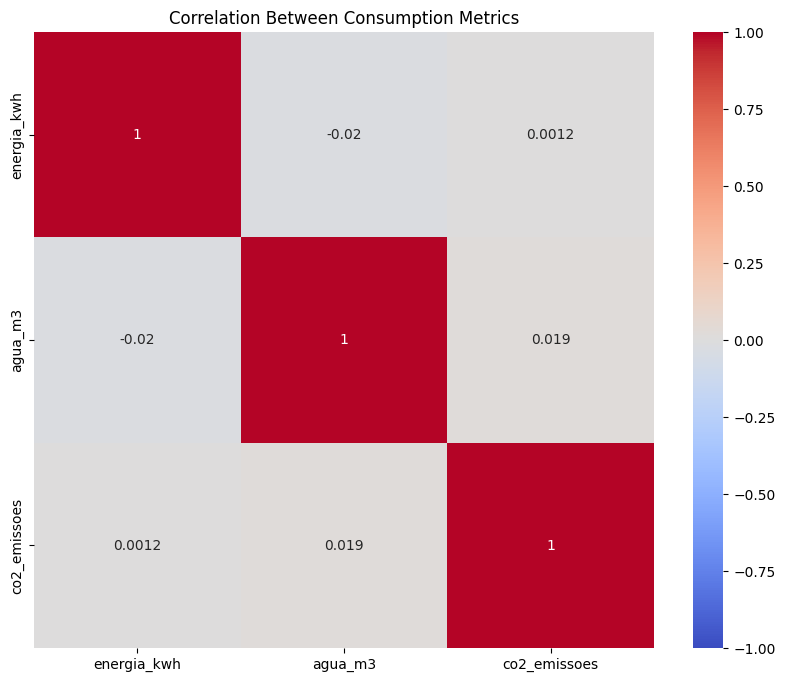


=== Outlier Detection ===

Outliers in energia_kwh:
Empty DataFrame
Columns: [empresa, setor, energia_kwh]
Index: []

Outliers in agua_m3:
Empty DataFrame
Columns: [empresa, setor, agua_m3]
Index: []

Outliers in co2_emissoes:
Empty DataFrame
Columns: [empresa, setor, co2_emissoes]
Index: []

=== Statistical Comparison of Sectors ===

Kruskal-Wallis H-test for energia_kwh:
H-statistic: 6.02
p-value: 0.3047

Kruskal-Wallis H-test for agua_m3:
H-statistic: 2.39
p-value: 0.7925

Kruskal-Wallis H-test for co2_emissoes:
H-statistic: 5.32
p-value: 0.3779


In [12]:
if __name__ == "__main__":
    # Execute all analyses
    print("=== Original Analysis ===")
    analyze_sector_consumption()
    identify_top_consumers()
    
    print("\n=== Correlation Analysis ===")
    analyze_correlations()
    
    print("\n=== Outlier Detection ===")
    detect_outliers()
    
    print("\n=== Statistical Comparison of Sectors ===")
    compare_sectors()

## Primeiras Conclusões:

- Não há diferença estatisticamente significativa entre os setores
- Os setores têm padrões de consumo mais similares do que diferentes
- Não podemos afirmar com certeza estatística que um setor consome mais que outro

- O setor 'Varejo' é o que apresenta números absolutos maiores, embora a diferença não seja estatisticamente signifcativa


In [13]:
def analyze_distributions():
    metrics = ['energia_kwh', 'agua_m3', 'co2_emissoes']
    
    for metric in metrics:
        # Create box plot
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='setor', y=metric, data=df)
        plt.title(f'Distribuição de {metric} por Setor')
        plt.xticks(rotation=45)
        plt.show()

        # Create violin plot (shows full distribution)
        plt.figure(figsize=(12, 6))
        sns.violinplot(x='setor', y=metric, data=df)
        plt.title(f'Distribuição Detalhada de {metric} por Setor')
        plt.xticks(rotation=45)
        plt.show()
        
        # Print statistical summary
        print(f"\nEstatísticas Descritivas para {metric}:")
        print(df.groupby('setor')[metric].describe())

In [14]:
def compare_medians():
    metrics = ['energia_kwh', 'agua_m3', 'co2_emissoes']
    
    for metric in metrics:
        print(f"\nMedianas de {metric} por setor:")
        medians = df.groupby('setor')[metric].median().sort_values(ascending=False)
        print(medians)
        
        # Calculate and print the interquartile range (IQR)
        print(f"\nIntervalo Interquartil (IQR) de {metric} por setor:")
        iqr = df.groupby('setor')[metric].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
        print(iqr)

=== Análise de Distribuições ===


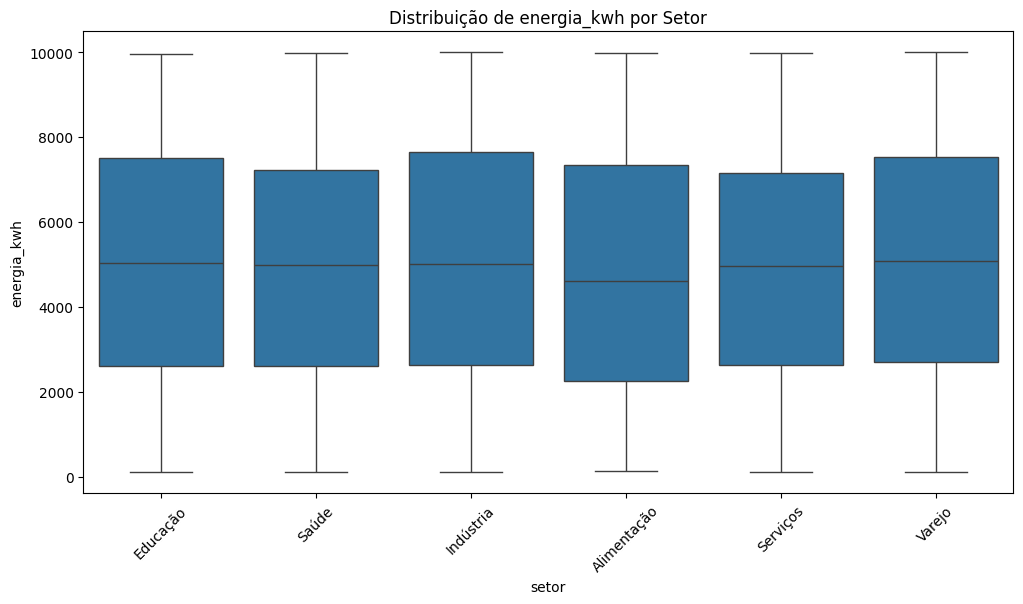

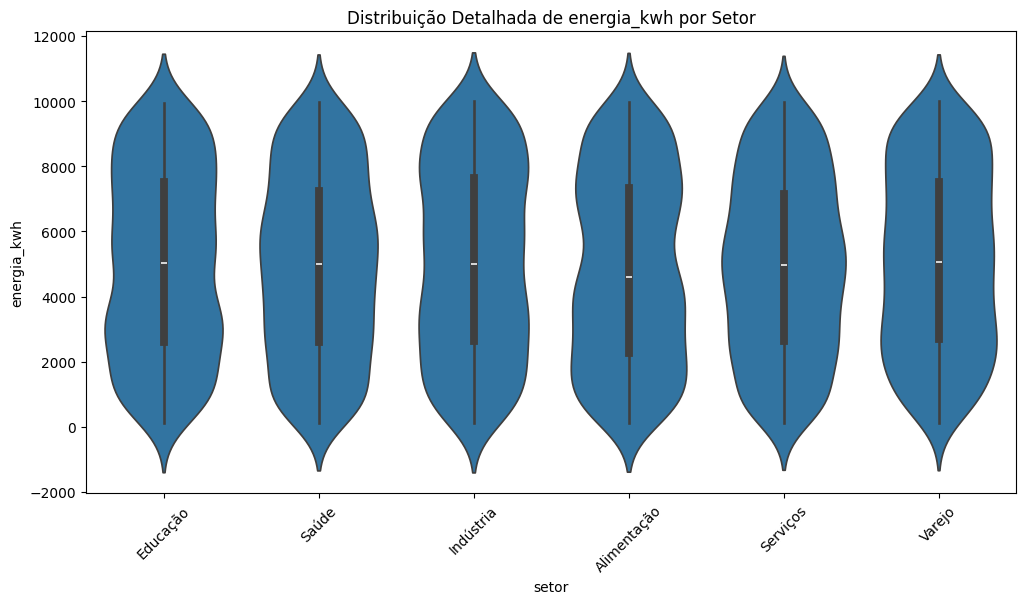


Estatísticas Descritivas para energia_kwh:
             count         mean          std     min        25%       50%  \
setor                                                                       
Alimentação  841.0  4820.346326  2885.328275  121.66  2261.8700  4610.110   
Educação     790.0  5012.179532  2844.455974  101.67  2601.2600  5027.935   
Indústria    849.0  5074.482214  2898.356238  102.71  2619.9300  5001.810   
Saúde        845.0  4940.869728  2786.943410  107.97  2614.3200  4985.120   
Serviços     827.0  4930.121959  2726.435084  100.62  2636.2400  4958.460   
Varejo       848.0  5113.261993  2778.831608  107.92  2698.4725  5074.025   

                  75%      max  
setor                           
Alimentação  7347.780  9981.92  
Educação     7508.435  9958.21  
Indústria    7640.780  9993.62  
Saúde        7226.630  9986.70  
Serviços     7163.085  9968.66  
Varejo       7531.560  9993.80  


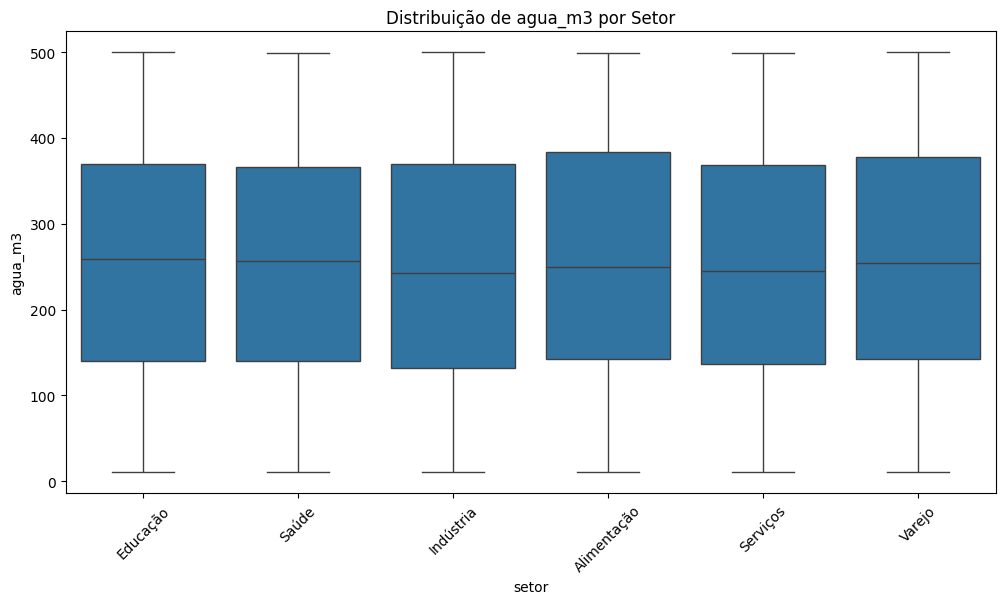

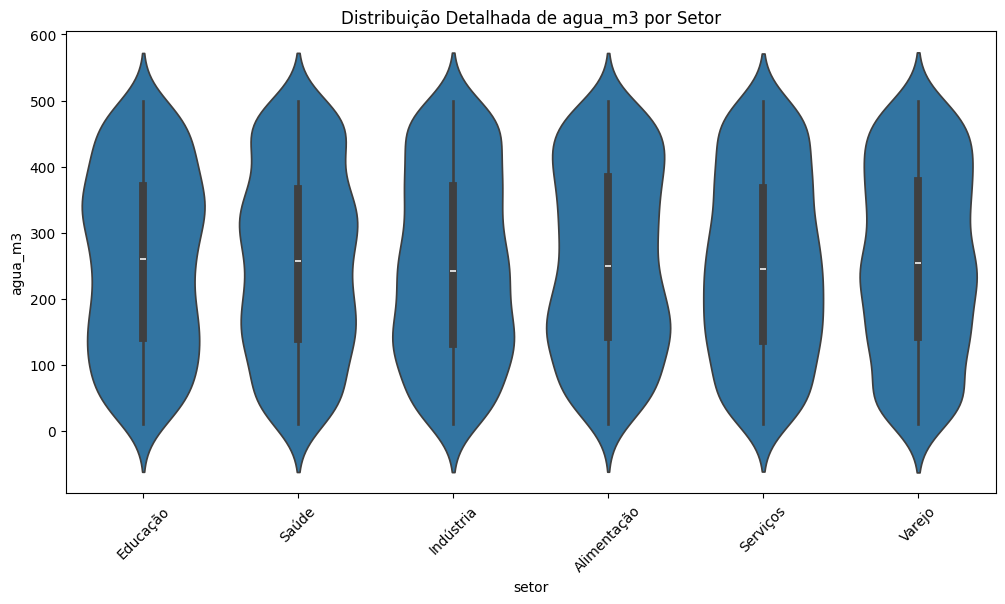


Estatísticas Descritivas para agua_m3:
             count        mean         std    min       25%      50%  \
setor                                                                  
Alimentação  841.0  257.406468  139.009318  10.36  142.1300  249.320   
Educação     790.0  256.899063  137.090722  10.12  139.8025  259.435   
Indústria    849.0  250.109176  140.196203  10.26  132.1100  242.480   
Saúde        845.0  255.785112  139.604944  10.19  139.5700  256.930   
Serviços     827.0  250.654039  138.570054  10.68  136.2900  244.860   
Varejo       848.0  256.788302  140.902616  10.20  141.7575  253.785   

                  75%     max  
setor                          
Alimentação  383.9600  499.63  
Educação     370.0150  499.76  
Indústria    369.8700  499.75  
Saúde        366.5000  499.59  
Serviços     367.9600  498.87  
Varejo       377.8125  499.71  


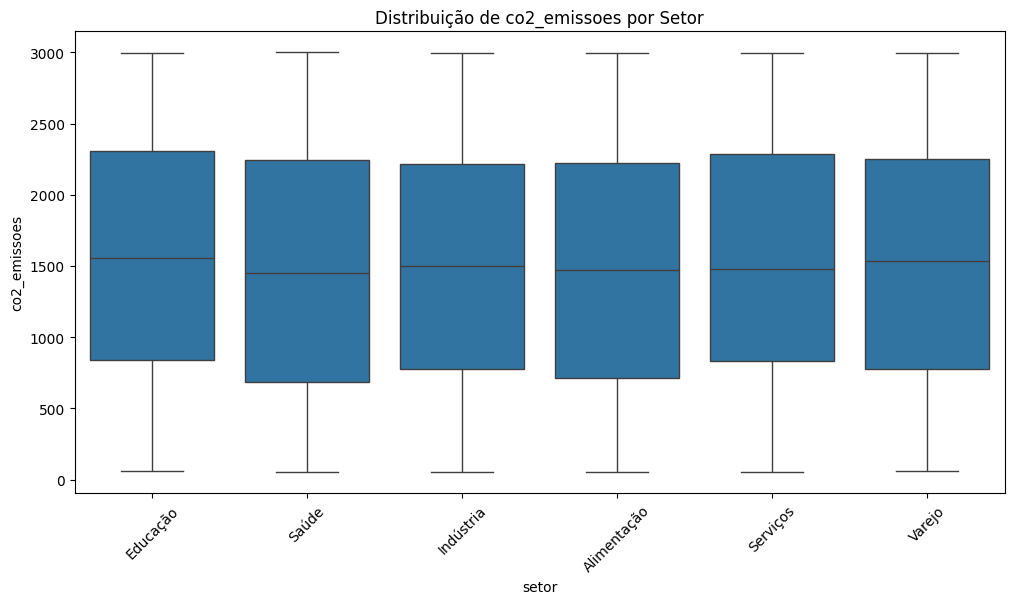

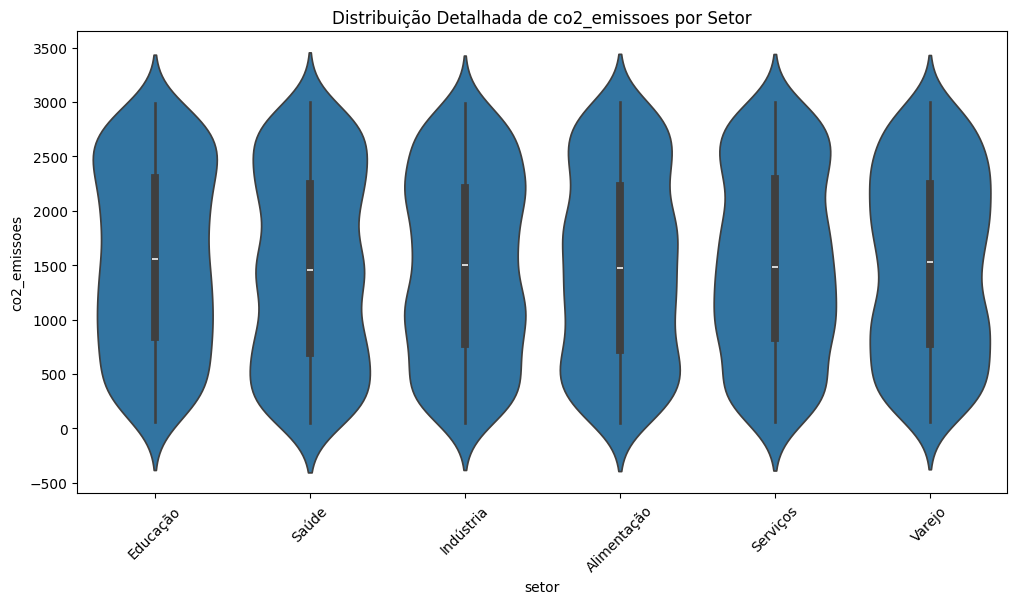


Estatísticas Descritivas para co2_emissoes:
             count         mean         std    min       25%       50%  \
setor                                                                    
Alimentação  841.0  1488.135993  857.579452  52.86  715.9500  1474.310   
Educação     790.0  1561.786076  839.770564  59.11  840.3300  1553.225   
Indústria    849.0  1494.268622  836.591497  51.51  776.9700  1497.820   
Saúde        845.0  1475.098225  878.297824  51.12  688.2800  1453.570   
Serviços     827.0  1517.344643  847.619766  54.51  834.3450  1480.680   
Varejo       848.0  1513.928007  836.020836  57.72  776.0725  1531.880   

                   75%      max  
setor                            
Alimentação  2224.5900  2996.41  
Educação     2304.2100  2992.63  
Indústria    2213.1200  2992.39  
Saúde        2245.6800  2999.64  
Serviços     2288.7450  2998.64  
Varejo       2250.1175  2997.45  

=== Comparação de Medianas ===

Medianas de energia_kwh por setor:
setor
Varejo         5

In [15]:
if __name__ == "__main__":
    print("=== Análise de Distribuições ===")
    analyze_distributions()
    
    print("\n=== Comparação de Medianas ===")
    compare_medians()